# Density based Spatial clustering of Applications with noise

DBSCAN is robust to an outlier ( It can identify the outliers)

It should be directly density reachable, sometime DBSCAN performs better than K Means clustering

# Density based clustering

Clustering analysis or simply Clustering is basically an Unsupervised learning method that divides the data points into a number of specific batches or groups, such that the data points in the same groups have similar properties and data points in different groups have different properties in some sense. It comprises many different methods based on differential evolution. 

K-Means (distance between points), Affinity propagation (graph distance), Mean-shift (distance between points), DBSCAN (distance between nearest points), Gaussian mixtures (Mahalanobis distance to centers), Spectral clustering (graph distance) etc.

In [59]:
# Eps (Radius of a circle)
# MinPoints( We have to define)
# Core points(If it satiesfies conditions of minimum points)
# Border Points ( Neighbour of any core point)
# Noise points ( neither core point and boundry point) (outlier)

# DBSCAN algorithm requires two parameters:

eps : It defines the neighborhood around a data point i.e. if the distance between two points is lower or equal to ‘eps’ then they are considered as neighbors. If the eps value is chosen too small then large part of the data will be considered as outliers. If it is chosen very large then the clusters will merge and majority of the data points will be in the same clusters. One way to find the eps value is based on the k-distance graph.
    
MinPts: Minimum number of neighbors (data points) within eps radius. Larger the dataset, the larger value of MinPts must be chosen. As a general rule, the minimum MinPts can be derived from the number of dimensions D in the dataset as, MinPts >= D+1. The minimum value of MinPts must be chosen at least 3.


# In this algorithm, we have 3 types of data points.

Core Point: A point is a core point if it has more than MinPts points within eps. 
    
Border Point: A point which has fewer than MinPts within eps but it is in the neighborhood of a core point. 
    
Noise or outlier: A point which is not a core point or border point.

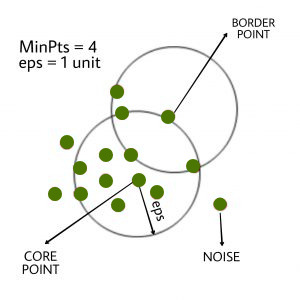

In [3]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\db.jpeg')

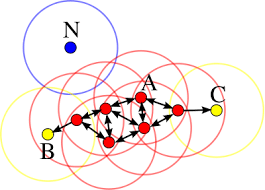

In [61]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\db6.png')

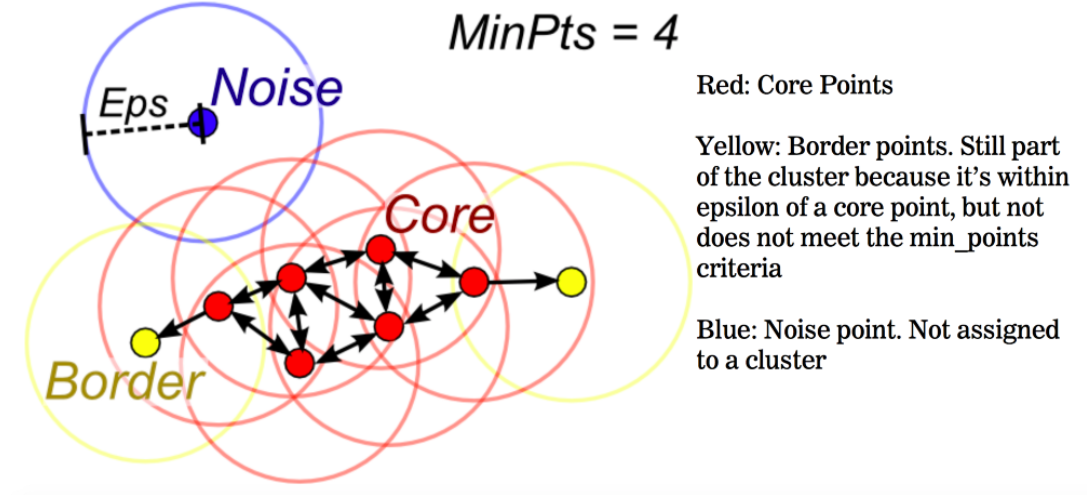

In [62]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\db7.png')

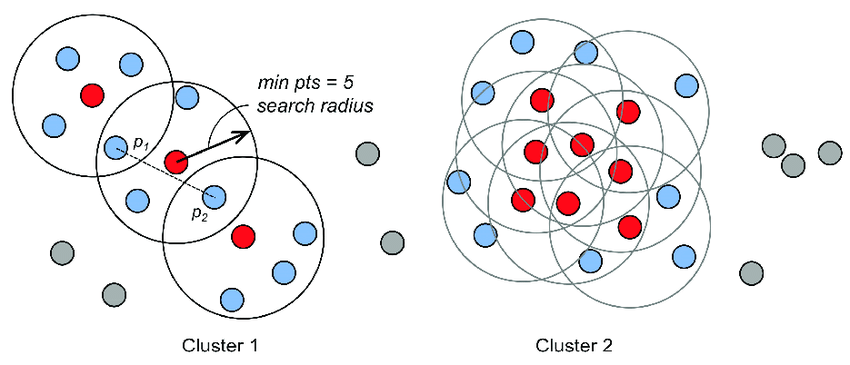

In [63]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\db8.png')

# DBSCAN algorithm can be abstracted in the following steps :

Find all the neighbor points within eps and identify the core points or visited with more than MinPts neighbors.

For each core point if it is not already assigned to a cluster, create a new cluster.

Find recursively all its density connected points and assign them to the same cluster as the core point. 

A point a and b are said to be density connected if there exist a point c which has a sufficient number of points in its neighbors and both the points a and b are within the eps distance. This is a chaining process. So, if b is neighbor of c, c is neighbor of d, d is neighbor of e, which in turn is neighbor of a implies that b is neighbor of a.

Iterate through the remaining unvisited points in the dataset. Those points that do not belong to any cluster are noise.

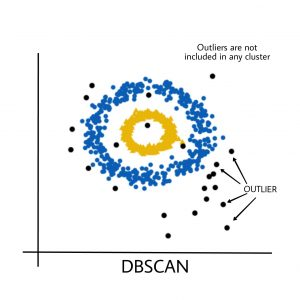

In [7]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\db2.jpg')

In [10]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

In [11]:
np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]
 

In [12]:
# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

# Adding noise to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])


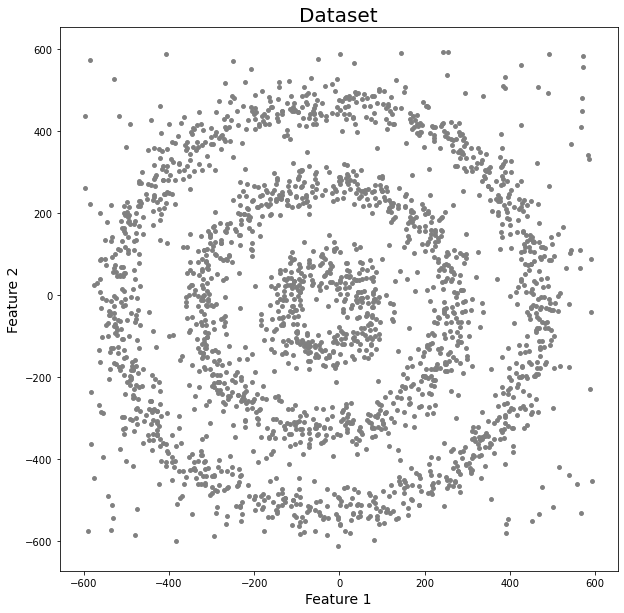

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df=pd.read_csv("C:\\Users\\uttam.grade\\Downloads\\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'SpendScore'},inplace=True)

In [65]:
df1 = [["Gender", "Age"]]

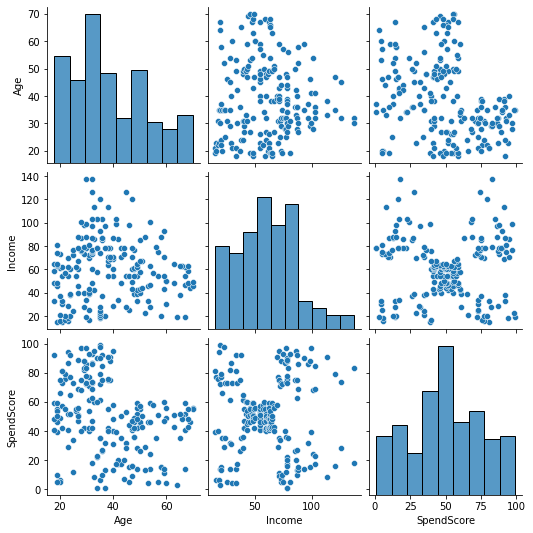

In [67]:
sns.pairplot(df)

In [25]:
df=df.drop(['CustomerID'],axis=1)

In [26]:
df.head()

,Gender,Age,Income,SpendScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


<AxesSubplot:>

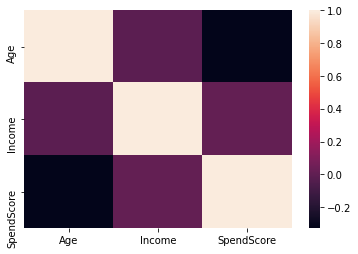

In [27]:
sns.heatmap(df.corr())

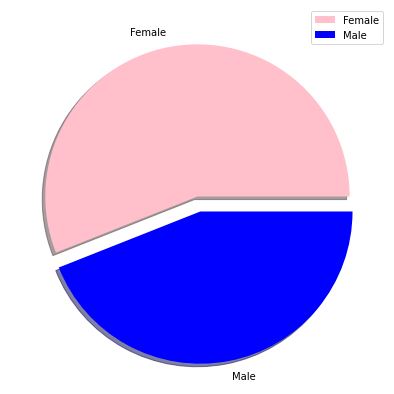

In [28]:
plt.figure(figsize=(7,7))
size=df['Gender'].value_counts()
label=['Female','Male']
color=['Pink','Blue']
explode=[0,0.1]
plt.pie(size,explode=explode,labels=label,colors=color,shadow=True)
plt.legend()
plt.show()

C:\Users\uttam.grade\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, '18'),
  Text(1, 0, '19'),
  Text(2, 0, '20'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '23'),
  Text(6, 0, '24'),
  Text(7, 0, '25'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '28'),
  Text(11, 0, '29'),
  Text(12, 0, '30'),
  Text(13, 0, '31'),
  Text(14, 0, '32'),
  Text(15, 0, '33'),
  Text(16, 0, '34'),
  Text(17, 0, '35'),
  Text(18, 0, '36'),
  Text(19, 0, '37'),
  Text(20, 0, '38'),
  Text(21, 0, '39'),
  Text(22, 0, '40'),
  Text(23, 0, '41'),
  Text(24, 0, '42'),
  Text(25, 0, '43'),
  Text(26, 0, '44'),
  Text(27, 0, '45'),
  Text(28, 0, '46'),
  Text(29, 0, '47'),
  Text(30, 0, '48'),
  Text(31, 0, '49'),
  Text(32, 0, '50'),
  Text(33, 0, '51'),
  Text(34, 0, '52'),
  Text(35, 0, '53'),
  Text(36, 0, '54'),
  T

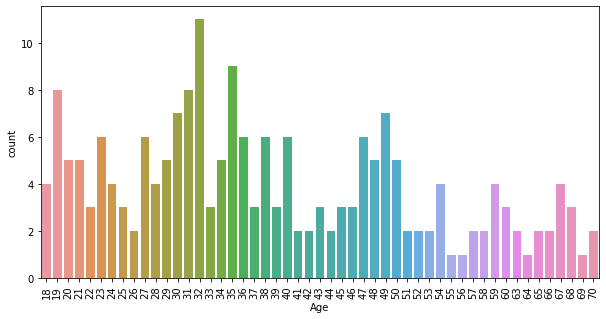

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(df['Age'])
plt.xticks(rotation=90)

C:\Users\uttam.grade\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='SpendScore'>

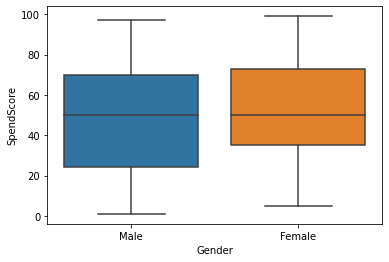

In [30]:
sns.boxplot(df['Gender'],df['SpendScore'])

C:\Users\uttam.grade\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='count'>

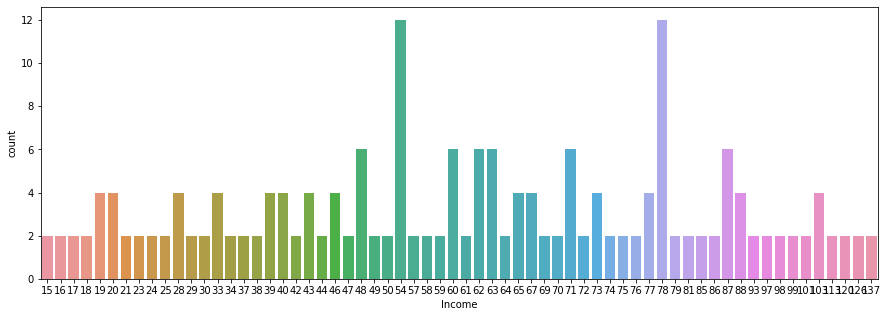

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(df['Income'])

Text(0, 0.5, 'Spendscore')

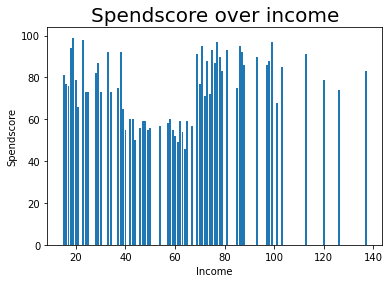

In [32]:
plt.bar(df['Income'],df['SpendScore'])
plt.title('Spendscore over income',fontsize=20)
plt.xlabel('Income')
plt.ylabel('Spendscore')

# DBSCAN

In [35]:
x=df.iloc[:,[2,3]].values

In [36]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [37]:
model=db.fit(x)

In [38]:
label=model.labels_

In [39]:
label

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [69]:
np.zeros_like(label)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [70]:
db.core_sample_indices_

array([ 58,  59,  62,  64,  66,  67,  69,  72,  74,  75,  76,  77,  78,
        80,  81,  83,  85,  87,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 119, 129, 131, 136, 137, 151, 153, 155, 170],
      dtype=int64)

In [71]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 9


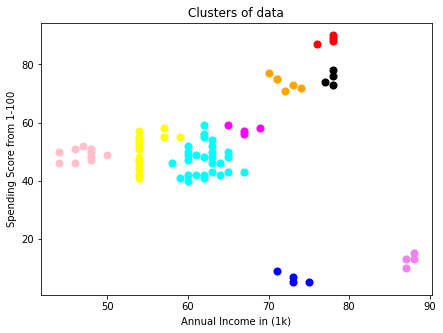

In [41]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [45]:
country_data = pd.read_csv('C:\\Users\\uttam.grade\\Downloads\\Country-data.csv')
country_data.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


In [46]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Text(0.5, 1.0, 'Correlation Map Of Country Data')

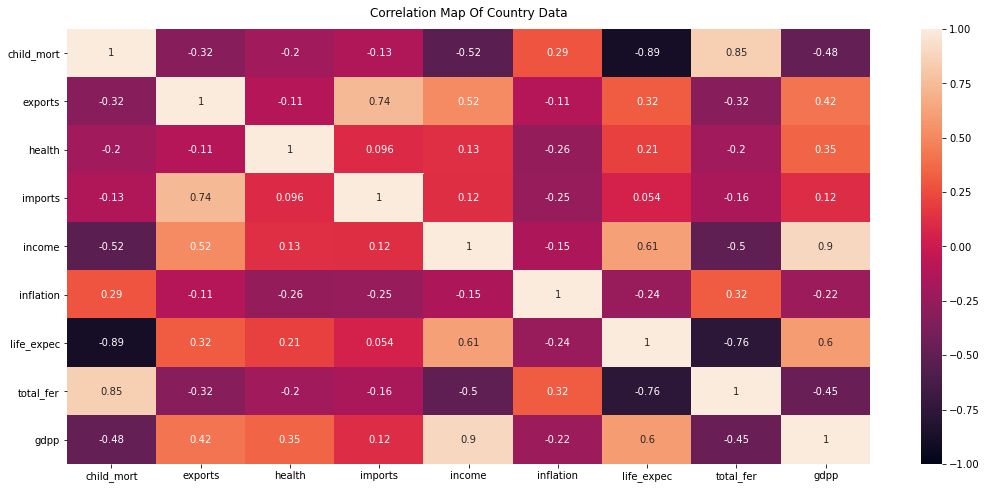

In [72]:
plt.figure(figsize=(18, 8))
sns.heatmap(country_data.corr(), vmin = -1, vmax = 1, annot = True)
plt.title('Correlation Map Of Country Data', fontdict={'fontsize':12}, pad=12)

In [48]:
count_data = country_data[['child_mort', 'imports', 'gdpp']]

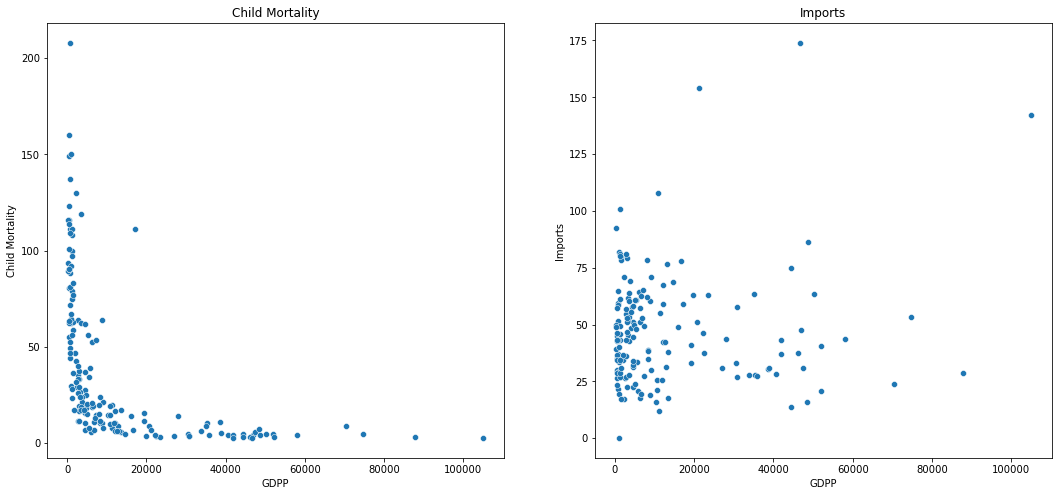

In [49]:
plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = count_data)
plt.title('Child Mortality')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'gdpp', y = 'imports', data = count_data)
plt.title('Imports')
plt.xlabel('GDPP')
plt.ylabel('Imports')
plt.show()

# KMeans Clustering

# Elbow Method

In [50]:
number_of_cluster = range(1,11)
clusterings = [KMeans(n_clusters = k).fit(count_data) for k in number_of_cluster]
centroids = [k.cluster_centers_ for k in clusterings]

D_k = [cdist(count_data, cent, 'euclidean') for cent in centroids] 
cIdx = [np.argmin(D, axis = 1) for D in D_k] 
dist = [np.min(D, axis = 1) for D in D_k] 
avg_withinSS = [sum(d)/count_data.shape[0] for d in dist] 

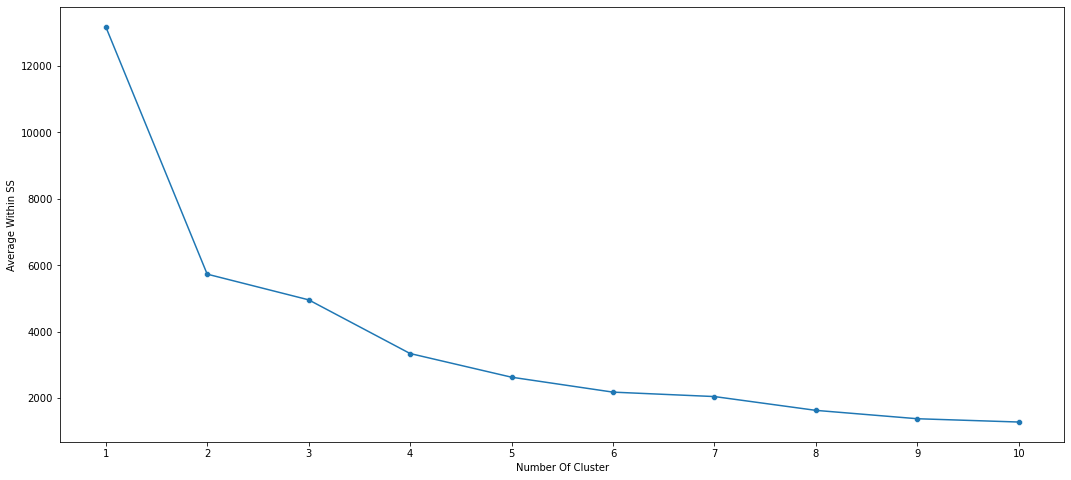

In [51]:
plt.figure(figsize=(18,8))
sns.lineplot(number_of_cluster, avg_withinSS)
sns.scatterplot(number_of_cluster, avg_withinSS)
plt.xticks(number_of_cluster)
plt.xlabel('Number Of Cluster')
plt.ylabel('Average Within SS')
plt.show()

In [77]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(count_data)
country_clust = count_data.copy()
country_clust['clustkmeans'] = kmeans.labels_

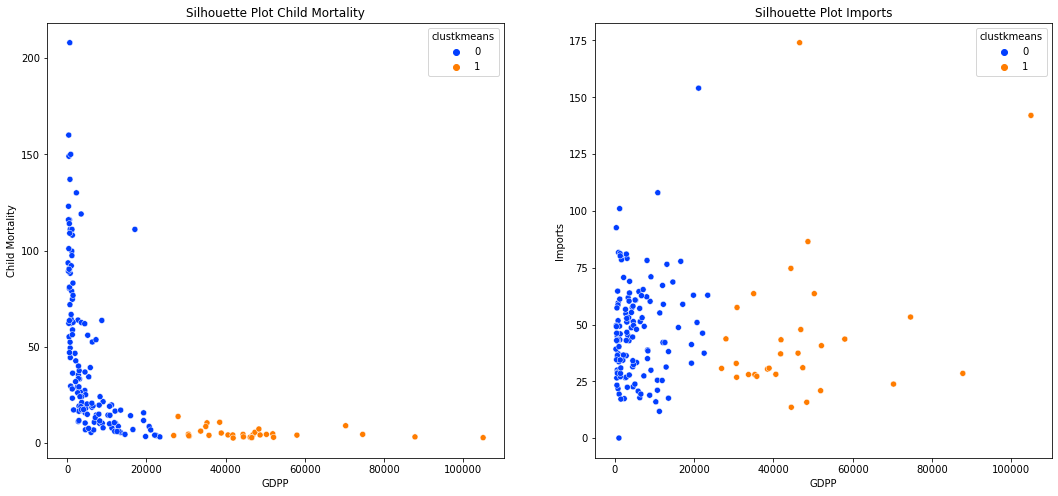

In [78]:
plt.figure(figsize = (18,8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = country_clust, hue = 'clustkmeans', palette = 'bright')
plt.title('Silhouette Plot Child Mortality')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'gdpp', y = 'imports', data = country_clust, hue = 'clustkmeans', palette = 'bright')
plt.title('Silhouette Plot Imports')
plt.xlabel('GDPP')
plt.ylabel('Imports')
plt.show()

In [54]:
cluster_name = ['Cluster 0', 'Cluster 1']
color = ['Blue', 'Orange']
mortality = ['Low GDPP VS Low to Medium Child Mortality', 'Medium GDPP VS Low Child Mortality']
imports = ['Low GDPP VS Medium Imports', 'Medium GDPP VS Medium Imports']
best_summary = pd.DataFrame({'Color': color, 'Name': cluster_name,
                        'Child Mortality': mortality, 'Imports': imports})
best_summary

,Color,Name,Child Mortality,Imports
0,Blue,Cluster 0,Low GDPP VS Low to Medium Child Mortality,Low GDPP VS Medium Imports
1,Orange,Cluster 1,Medium GDPP VS Low Child Mortality,Medium GDPP VS Medium Imports


# DBSCAN

Optimizing Minimum Sample And Epsilon

In [79]:
country_clust

,child_mort,imports,gdpp,clustkmeans
0,90.2,44.9,553,0
1,16.6,48.6,4090,0
2,27.3,31.4,4460,0
3,119.0,42.9,3530,0
4,10.3,58.9,12200,0
...,...,...,...,...
162,29.2,52.7,2970,0
163,17.1,17.6,13500,0
164,23.3,80.2,1310,0
165,56.3,34.4,1310,0


In [55]:
scaler = StandardScaler()
country_clust_scaled = scaler.fit_transform(country_clust)
# Grid Search CV
for eps in [i/10 for i in range(2,5)]:
    for min_samples in range (7,9):
        print(f'\neps {eps}')
        print(f'\min samples {min_samples}')
        
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        labels = dbscan.fit_predict(country_clust_scaled)
        score = silhouette_score(country_clust_scaled, labels)
        
        print(f'clusters present: {np.unique(labels)}')
        print(f'clusters sizes: {np.bincount(labels + 1)}')
        print(f'Silhouette Score: {score}')


eps 0.2
\min samples 7
clusters present: [-1  0]
clusters sizes: [156  11]
Silhouette Score: -0.2393615335452477

eps 0.2
\min samples 8
clusters present: [-1  0]
clusters sizes: [156  11]
Silhouette Score: -0.2393615335452477

eps 0.3
\min samples 7
clusters present: [-1  0  1  2]
clusters sizes: [119  30  11   7]
Silhouette Score: -0.1695682589970686

eps 0.3
\min samples 8
clusters present: [-1  0  1]
clusters sizes: [130  29   8]
Silhouette Score: -0.15138644771886964

eps 0.4
\min samples 7
clusters present: [-1  0  1]
clusters sizes: [ 53 101  13]
Silhouette Score: 0.2581064152198133

eps 0.4
\min samples 8
clusters present: [-1  0  1  2]
clusters sizes: [70 78 11  8]
Silhouette Score: 0.11859148004718649


The best hyperparam are eps: 0.4 and min samples: 7, because it has the highest silhouette score, but samples is inlcuded with noise.

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. 1: Means clusters are well apart from each other and clearly distinguished. ... a= average intra-cluster distance i.e the average distance between each point within a cluster.

In [56]:
dbscan = DBSCAN(eps = 0.4, min_samples = 7)
labels = dbscan.fit_predict(country_clust_scaled)
country_clust['clustdbscan'] = labels

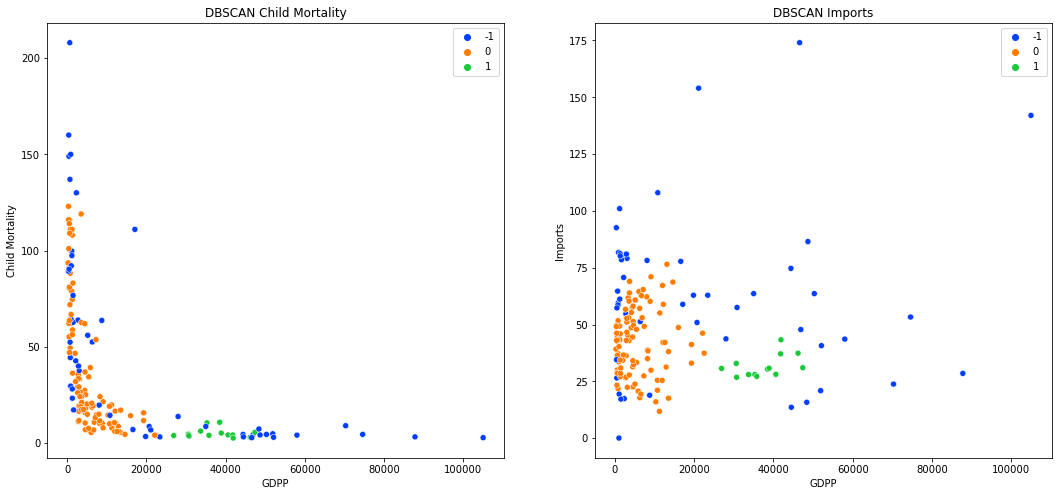

In [57]:
plt.figure(figsize = (18,8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = country_clust, hue = 'clustdbscan', palette = 'bright')
plt.legend(loc = 1)
plt.title('DBSCAN Child Mortality')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'gdpp', y = 'imports', data = country_clust, hue = 'clustdbscan', palette = 'bright')
plt.legend(loc = 1)
plt.title('DBSCAN Imports')
plt.xlabel('GDPP')
plt.ylabel('Imports')
plt.show()

In [81]:
cluster_name = ['Cluster -1', 'Cluster 0', 'Cluster 1']
color = ['Blue', 'Orange', 'Green']
mortality = ['Noise', 'Low GDPP VS Low to Medium Imports', 'Medium GDPP VS Low Imports']
imports = ['Noise', 'Low GDPP VS Medium Imports', 'Medium GDPP VS Medium Imports']
dbscan_summary = pd.DataFrame({'Color': color, 'Name': cluster_name,
                        'Child Mortality': mortality, 'Imports': imports})
dbscan_summary

,Color,Name,Child Mortality,Imports
0,Blue,Cluster -1,Noise,Noise
1,Orange,Cluster 0,Low GDPP VS Low to Medium Imports,Low GDPP VS Medium Imports
2,Green,Cluster 1,Medium GDPP VS Low Imports,Medium GDPP VS Medium Imports


 there is a lot of noise more than I think. With DBSCAN, I can see the accurate model.